# Modele analizy danych

Tomasz Rodak

---

### Zadanie 7.1

Mamy model, który generuje dane w dwóch krokach:

1. Losujemy wartość $y\in\{0,1\}$ z prawdopodobieństwami $P(Y=1)=p$ oraz $P(Y=0)=1-p$.
2. Warunkowo względem $Y=y$ losujemy wartość $x\in\mathbb{R}$ z rozkładu normalnego $N(\mu_y,\sigma^2)$.

Niech $(X,Y)$ będzie parą zmiennych losowych o wartościach w $\mathbb{R}\times\{0,1\}$.
Para ta ma pewien rozkład łączny, który można zapisać jako odzwierciedlenie opisanego wyżej modelu:

\begin{equation*}
g(x,y) = g_Y(y) g_{X|Y}(x\mid y),
\end{equation*}

gdzie

* $g_Y(1)=p$, $g_Y(0)=1-p$,
* $g_{X|Y}(x\mid y)$ jest gęstością rozkładu normalnego $N(\mu_y,\sigma^2)$.

---

**Przypis.** Formalnie funkcja $g(x,y)$ jest gęstością rozkładu łącznego $(X,Y)$ względem miary produktowej $\lambda\otimes\nu_{\text{count}}$, gdzie $\lambda$ jest miarą Lebesgue’a na $\mathbb{R}$, a $\nu_{\text{count}}$ miarą zliczającą na $\{0,1\}$. Całka względem tej miary ma postać:

\begin{equation*}
\int_{\mathbb{R}\times\{0,1\}} f(x,y)d(\lambda\otimes\nu_{\text{count}})(x,y)=
\int_{\mathbb{R}} f(x,0)dx + \int_{\mathbb{R}} f(x,1)dx.
\end{equation*}

Fakt, że $g(x,y)$ jest gęstością rozkładu łącznego $(X,Y)$ względem tej miary, oznacza, że całki względem miary probabilistycznej $P_{(X,Y)}$ można wyrazić jako całki względem miary produktowej $\lambda\otimes\nu_{\text{count}}$:

\begin{equation*}
\int_{\Omega} f\big((X(\omega),Y(\omega))\big)dP_{(X,Y)}(\omega) = \int_{\mathbb{R}\times\{0,1\}} f(x,y) g(x,y)d(\lambda\otimes\nu_{\text{count}})(x,y).
\end{equation*}

W szczególności:

\begin{equation*}
E\big[h(X,Y)\big] = \int_{\mathbb{R}\times\{0,1\}} h(x,y) g(x,y)d(\lambda\otimes\nu_{\text{count}})(x,y).
\end{equation*}

oraz

\begin{equation*}
P\big((X,Y)\in B\big) = \int_{B} g(x,y)d(\lambda\otimes\nu_{\text{count}})(x,y),
\end{equation*}

dla dowolnego mierzalnego zbioru $B\subseteq \mathbb{R}\times\{0,1\}$.

---

Ponieważ rozkład łączny $(X,Y)$ jest znany, więc możemy wyznaczyć rozkład warunkowy $Y$ względem $X$, zbudować klasyfikator Bayesa, obliczyć oczekiwany błąd predykcji oraz porównać go z wynikami uzyskanymi przy użyciu praktycznych metod klasyfikacji, takich jak metoda k-najbliższych sąsiadów czy regresja logistyczna.

#### Rozkład warunkowy $Y$ względem $X$

Z twierdzenia Bayesa mamy:

\begin{equation*}
g_{Y|X}(y\mid x) = \frac{g(x, y)}{g_X(x)},
\end{equation*}

gdzie $g_X(x)$ jest brzegową funkcją gęstości zmiennej losowej $X$. Zatem:

\begin{equation*}
g_X(x) = \sum_{y\in\{0, 1\}} g(x, y) = g(x, 0) + g(x, 1) = (1-p) N(x\mid\mu_0, \sigma^2) + p N(x\mid\mu_1, \sigma^2).
\end{equation*}

Wobec tego:

\begin{equation*}
g_{Y|X}(y\mid x) = \frac{g_Y(y) g_{X|Y}(x\mid y)}{(1-p) N(x\mid\mu_0, \sigma^2) + p N(x\mid\mu_1, \sigma^2)}.
\end{equation*}

#### Klasyfikator Bayesa

Klasyfikator Bayesa przypisuje obserwację $x$ do klasy $1$, jeśli:

\begin{equation*}
g_{Y|X}(1\mid x) > g_{Y|X}(0\mid x),
\end{equation*}

w przeciwnym razie przypisuje ją do klasy $0$. Zatem $x$ zostanie przypisane do klasy $1$, jeśli:

\begin{equation*}
g_Y(1) g_{X|Y}(x\mid 1) > g_Y(0) g_{X|Y}(x\mid 0),
\end{equation*}

czyli:

\begin{equation*}
p N(x\mid\mu_1, \sigma^2) > (1-p) N(x\mid\mu_0, \sigma^2).
\end{equation*}

Podstawiając wzór na gęstość rozkładu normalnego i logarytmując obie strony nierówności, otrzymujemy postać równoważną:

\begin{equation*}
2x(\mu_1 - \mu_0) > \mu_1^2 - \mu_0^2 - 2\sigma^2 \log\left(\frac{p}{1-p}\right).
\end{equation*}

Zatem, oznaczając klasyfikator Bayesa przez $f^*$, mamy:

\begin{equation*}
f^*(x) = \begin{cases}
1 & \text{gdy } 2x(\mu_1 - \mu_0) > \mu_1^2 - \mu_0^2 - 2\sigma^2 \log\left(\frac{p}{1-p}\right), \\
0 & \text{w przeciwnym razie}.
\end{cases}
\end{equation*}

Widzimy, że $f^*$ jest funkcją stałą na przedziałach $(-\infty, t)$ oraz $[t, \infty)$, gdzie:

\begin{equation}
t = \frac{\mu_1+\mu_0}{2} - \frac{\sigma^2}{\mu_1 - \mu_0} \log\left(\frac{p}{1-p}\right).\tag{wartość progowa}
\end{equation}

Od relacji między $\mu_1$ a $\mu_0$ zależy, czy klasyfikator przypisuje do klasy $1$ wartości większe czy mniejsze od progu $t$.

**Zauważmy, że konstrukcja klasyfikatora Bayesa nie wymaga znajomości rozkładu brzegowego $g_X(x)$.**

#### Błąd Bayesa

Błąd Bayesa to oczekiwane prawdopodobieństwo błędnej klasyfikacji przy użyciu klasyfikatora Bayesa:

\begin{equation*}
\operatorname{EPE}(f^*) = E(I(f^*(X) \neq Y)).
\end{equation*}

Z definicji wartości oczekiwanej względem rozkładu łącznego $(X,Y)$ otrzymujemy (zob. przypis):

\begin{equation*}
\operatorname{EPE}(f^*) = \int_{\mathbb{R}\times\{0, 1\}} I(f^*(x) \neq y) g(x, y) d(\lambda \otimes \nu_{\text{count}})(x,y).
\end{equation*}

Korzystając z postaci rozkładu łącznego $g(x,y)= g_Y(y) g_{X|Y}(x\mid y)$ przekształcamy powyższą całkę:

\begin{equation*}
\begin{split}
\operatorname{EPE}(f^*) &= \int_\mathbb{R}\left(I(f^*(x) \neq 0) (1-p) N(x\mid\mu_0, \sigma^2) + I(f^*(x) \neq 1) p N(x\mid\mu_1, \sigma^2)\right) \lambda(dx)\\
&= \int_{\{x: f^*(x) = 1\}} (1-p) N(x\mid\mu_0, \sigma^2) \lambda(dx) + \int_{\{x: f^*(x) = 0\}} p N(x\mid\mu_1, \sigma^2) \lambda(dx).
\end{split}
\end{equation*}

Zbiory $\{x: f^*(x) = 1\}$ oraz $\{x: f^*(x) = 0\}$ są przedziałami określonymi przez wartość progową $t$ z równania (wartość progowa). Załóżmy, że $\mu_1 > \mu_0$. Wówczas:

\begin{equation*}
\begin{split}
\operatorname{EPE}(f^*) &= \int_{-\infty}^{t} (1-p) N(x\mid\mu_0, \sigma^2) \lambda(dx) + \int_{t}^{\infty} p N(x\mid\mu_1, \sigma^2) \lambda(dx) \\
&= (1-p) \Phi(t\mid\mu_0, \sigma^2) + p \left(1 - \Phi(t\mid\mu_1, \sigma^2)\right) \\
&= (1-p) \Phi\left(\frac{t - \mu_0}{\sigma}\right) + p \left(1 - \Phi\left(\frac{t - \mu_1}{\sigma}\right)\right),
\end{split}
\end{equation*}

gdzie $\Phi(\cdot\mid\mu, \sigma^2)$ jest dystrybuantą rozkładu normalnego o średniej $\mu$ i wariancji $\sigma^2$. W przypadku, gdy $\mu_1 < \mu_0$, rozwiązanie jest analogiczne.

#### Część praktyczna

Ustal wartości parametrów modelu: $p$, $\mu_0$, $\mu_1$, $\sigma$ oraz liczbę obserwacji treningowych i testowych. Wygeneruj dane treningowe i testowe zgodnie z powyższym modelem. Następnie:
1. Oblicz błąd Bayesa dla ustalonych parametrów modelu - błąd teoretyczny najlepszego klasyfikatora $f^*$.
2. Wyznacz błąd klasyfikatora Bayesa na danych testowych - błąd empiryczny najlepszego klasyfikatora $f^*$.
3. Wyznacz błąd klasyfikatora $k$-najbliższych sąsiadów na danych testowych dla różnych wartości $k$. Uczenie modelu przeprowadź na danych treningowych.
4. Wyznacz błąd regresji logistycznej na danych testowych. Podobnie jak wyżej, uczenie modelu przeprowadź na danych treningowych.
5. Jeśli znasz inne metody klasyfikacji, możesz również je zastosować.

Eksperymentuj z różnymi wartościami parametrów. Skomentuj otrzymane wyniki.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [43]:
p = .4
mu0, mu1 = 0, 1
np.random.normal(0, 1)
sigma = .4
n_train, n_test = 200, 100_000

y_train = np.random.binomial(1, p, n_train)
x_train = [np.random.normal(mu0, sigma) if y==0 else np.random.normal(mu1, sigma) for y in y_train]
x_train = np.array(x_train)
y_test = np.random.binomial(1, p, n_test)
x_test = [np.random.normal(mu0, sigma) if y==0 else np.random.normal(mu1, sigma) for y in y_test]
x_test = np.array(x_test)

<Axes: ylabel='Density'>

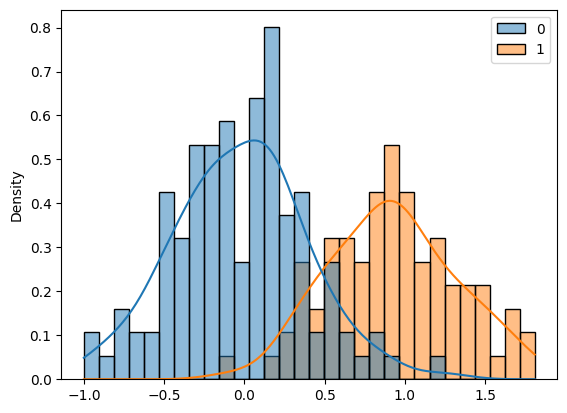

In [44]:
sns.histplot(x=x_train, hue=y_train, stat='density', kde=True, bins=30)

In [45]:
t = (mu1 + mu0) / 2 - sigma * np.log(p / (1 - p))
print(f'Wartość progowa: {t}')

Wartość progowa: 0.6621860432432657


In [46]:
EPE = (1-p) * (1 - norm.cdf(t, loc=mu0, scale=sigma)) + p * (norm.cdf(t, loc=mu1, scale=sigma))
print(f'Błąd Bayesa: {EPE}')

Błąd Bayesa: 0.10902317138550655


In [47]:
y_bayers_pred = (x_test > t).astype(int)
1 - accuracy_score(y_test, y_bayers_pred)

0.11055000000000004

In [48]:
confusion_matrix = pd.crosstab(y_test, y_bayers_pred, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
True,,,
0,56787,3008,59795
1,8047,32158,40205
All,64834,35166,100000


In [49]:
n_neighbors = 50
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train.reshape(-1, 1), y_train)
y_knn_pred = knn.predict(x_test.reshape(-1, 1))

In [50]:
1 - accuracy_score(y_test, y_knn_pred)

0.10868999999999995

In [51]:
confusion_matrix = pd.crosstab(y_test, y_knn_pred, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
True,,,
0,52875,6920,59795
1,3949,36256,40205
All,56824,43176,100000


In [52]:
relog = LogisticRegression()
relog.fit(x_train.reshape(-1, 1), y_train)
y_relog_pred = relog.predict(x_test.reshape(-1, 1))

In [53]:
1 - accuracy_score(y_test, y_relog_pred)

0.10540000000000005

In [42]:
confusion_matrix = pd.crosstab(y_test, y_relog_pred, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
True,,,
0,79012,852,79864
1,8235,11901,20136
All,87247,12753,100000


### Zadanie 7.2

Uzupełnij analizę z zadania 7.1 o brakujący przypadek $\mu_1 = \mu_0$. W szczególności:
* Jaki jest klasyfikator Bayesa, gdy $\mu_1 = \mu_0$?
* Jaki jest błąd Bayesa w tym przypadku?

### Zadanie 7.3

W zadaniu 7.1 założyliśmy, że wariancje rozkładów warunkowych są równe. Fakt ten spowodował, że klasyfikator Bayesa był funkcją progową z jednym progiem wyznaczonym z równania liniowego (prześledź rachunki i zwróć uwagę na to jak składnik kwadratowy względem $x$ się skraca). Przeprowadź analizę analogiczną do tej z zadania 7.1, ale dla przypadku, gdy wariancje rozkładów warunkowych są różne, tzn.:
* dla $y=0$: $X\mid Y=0 \sim N(\mu_0, \sigma_0^2)$,
* dla $y=1$: $X\mid Y=1 \sim N(\mu_1, \sigma_1^2)$.